# Исследование данных о продажах игр

ИНтернет-магазину стримчик необходимо спланировать рекламную кампанию на предстоящий 2017 год, для этого необходимо определить самые прибыльные игровые платформы и жанры, чтобы на основании этой информации сделать ставку на самые перспективные продукты.
Для этого из открытых источников были собраны данные о продажах игр в различных регионах и на различных платформах за продолжительный период времени.
Задачей данного исследования является анализ имеющегося датасета и формирование выводов, позволящих спланировать реклманую кампанию на 2017 год.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

data = pd.read_csv('datasets/games.csv')

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.columns = data.columns.str.lower()

## Подготовка данных

### Пропуски в названии игры (name)

In [4]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в названиях игр встречаются всего в двух строках, это старые игры 93го года, удалим эти строки из датасета.

In [5]:
data = data.dropna(subset=['name'])

### Пропуски в годах выпуска игр (year_of_release).

Оценим количество строк с пропусками.

In [6]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В виду небольшого количества пропусков удалим эти строки из датасета.

In [7]:
data = data.dropna(subset=['year_of_release'])

Изменим тип данных для года выпуска на целочисленный.

In [8]:
data['year_of_release'] = data['year_of_release'].astype('int32')

### Пропуски в оценках критиков (critic_score)

In [9]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
len(data[data['critic_score'].isna()]) / len(data)

0.5145341765993675

Оценки критиков отсутствуют для 51% игр, это очень много. Очень странно, что оценки отсутствуют у популярных игр вроде "Call of Duty: Black Ops 3", необходимо передать информацию тем, кто собирал эти данные.
Оставим пока эти данные без изменений и приведём тип данных в этм столбце к числовому.

In [11]:
data['critic_score'] = data['critic_score'].astype('float32')

### Пропуски в оценках игроков (user_score)

In [12]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
len(data[data['user_score'].isna()]) / len(data)

0.4016662612503041

Оценки отсутствуют у 40% игр, в т.ч. у популярных и продаваемых игр, это слишком много чтобы заполнять пропуски автоматически.

In [14]:
data['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
len(data[data['user_score'] == 'tbd']) / len(data)

0.14449039163220628

Почти у 15 % оценок игроков присутствует значение 'tbd', это означает, что оценка не была получена, что равносильно значению NaN. Заменим 'tnd' на NaN и приведём тип данных в стобце к числовому.

In [16]:

data.loc[data['user_score'] == 'tbd' , 'user_score'] = np.NaN
data['user_score'] = data['user_score'].astype('float32')

Пропущенные значения NaN оставим без изменений.

### Пропуски в рейтинг (rating)

In [17]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
len(data[data['rating'].isna()]) / len(data)

0.40598394551204087

In [19]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Т.к. столбец с рейтингом заполняется строковыми значениями, заменим пропуски на 'undefined'.

In [20]:
data['rating'] = data['rating'].fillna('undefined')

### Добавим столбец с суммарными продажами.

In [21]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Исследовательский анализ данных

### Изучим количество игр, выпущенных в течение каждого года.

In [22]:
pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<Axes: >

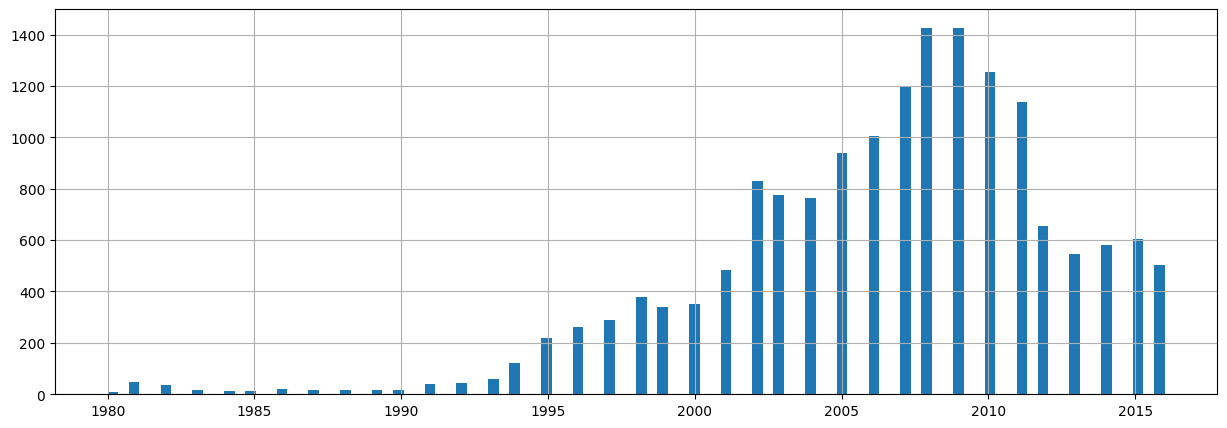

In [23]:
data['year_of_release'].hist(bins=100, figsize=(15,5))

Имеющиеся даные говорят о том,  что количество игр росло по экспоненте до 2007 года, после чего начало так же резко падать, что видимо связано с ростом сложности производства игр.

### Соберём в сводную таблицу информацию о суммарных продажах и о сроке работы платформ.

In [24]:
platform_stats = data.pivot_table(index='platform', \
                                  values=['total_sales', 'year_of_release'], \
                                  aggfunc={'total_sales': 'sum', 'year_of_release': pd.Series.nunique}).\
sort_values('total_sales', ascending=False)
platform_stats.columns=['total_sales', 'operating_years']
platform_stats

,total_sales,operating_years
platform,,
PS2,1233.56,12
X360,961.24,12
PS3,931.34,11
Wii,891.18,11
DS,802.78,11
PS,727.58,10
PS4,314.14,4
GBA,312.88,8
PSP,289.53,12


In [25]:
platform_stats['operating_years'].median() 

7.0

Полученные данные говорят, что платформы в среднем функционируют 7 лет.

### Исследование максимальных продаж на различных платформах.

Изучим 5 платформ с исторически максимальными продажами.

In [26]:
n = 5
top_platforms = platform_stats.index[0:n]

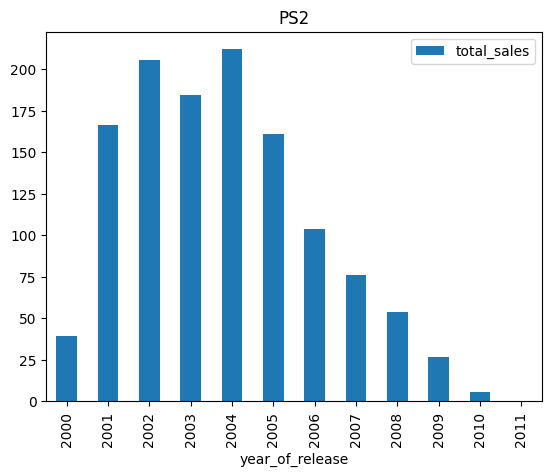

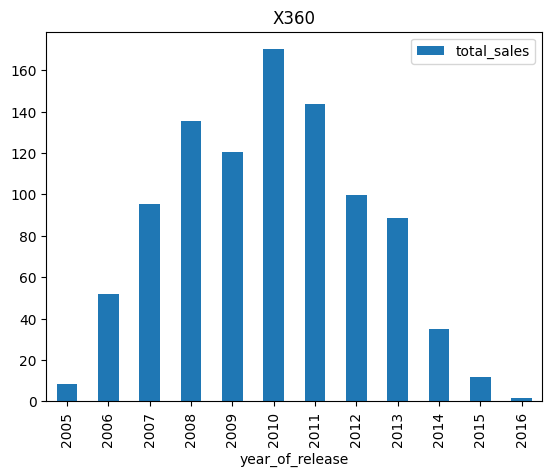

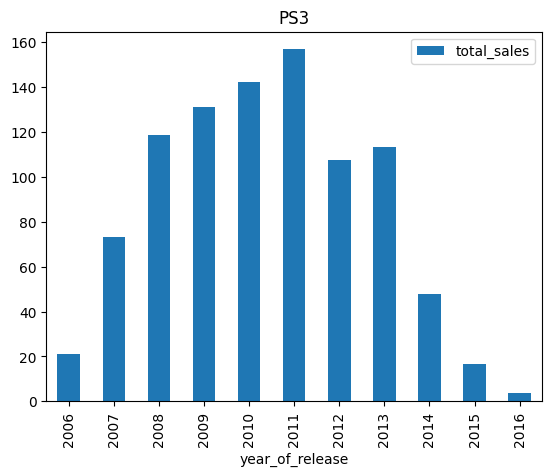

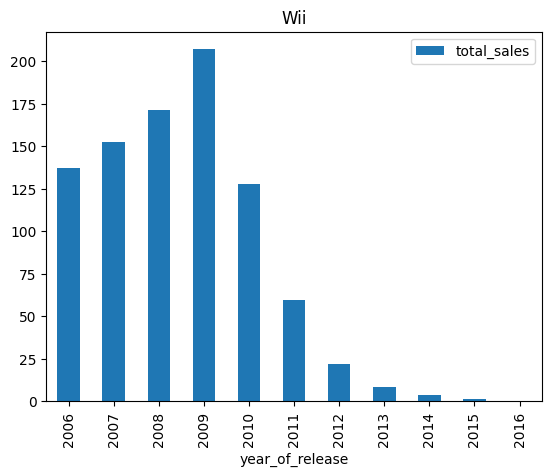

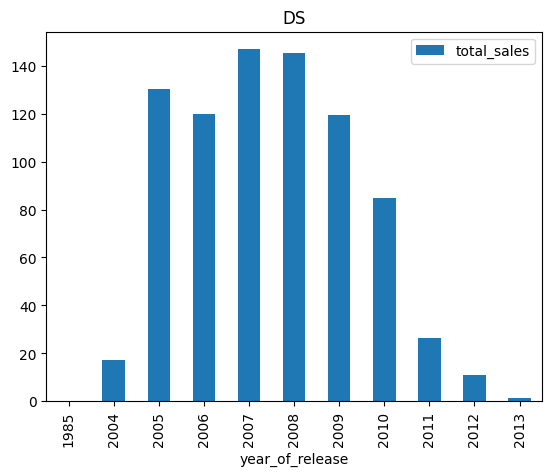

In [27]:
for platform in top_platforms:
    platfom_by_years = data[data['platform'] == platform].\
    pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    platfom_by_years.plot(y='total_sales', kind='bar', title=platform)

Из графиков видно, что платформы с исторически максимальными продажами больше не актуальны и продажи на них практически отсутствуют.

### Исследоваиие акутальных продаж на платформах.

Для дальнешйго исследования будем использовать данные за последние 5 лет.

In [28]:
data = data[data['year_of_release'] > 2011]

Соберём данные о глобальных продажах и покажем их распределение по платформам.

<Axes: title={'center': 'Total sales by platform in 2011-2016'}, ylabel='total_sales'>

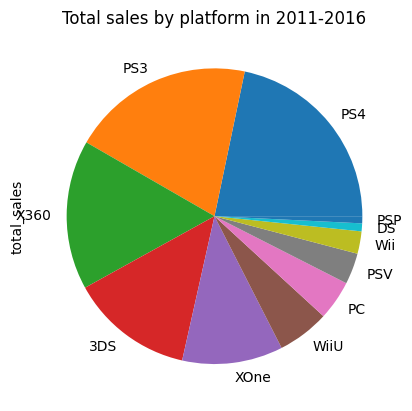

In [29]:
platform_revenues = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_revenues.plot(kind='pie', title='Total sales by platform in 2011-2016')

Выберем 7 платформ с макисмальными продажами и посмотрим как эти продажи распределены по годам.

In [30]:
n = 7
top_platforms = platform_revenues.index[:n]

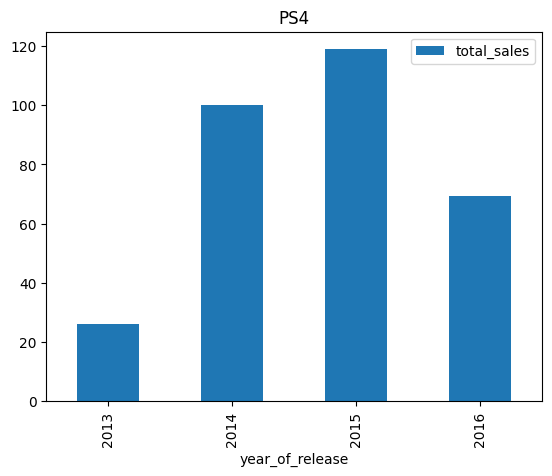

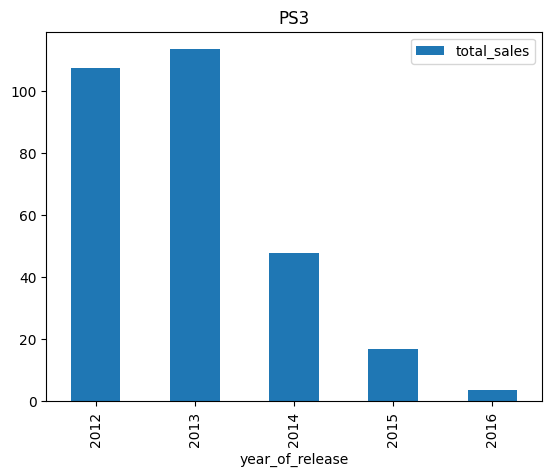

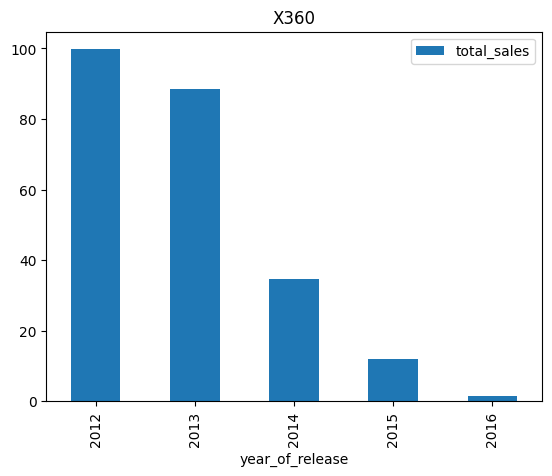

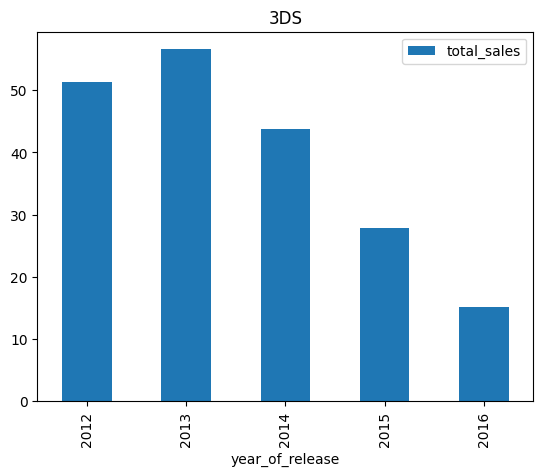

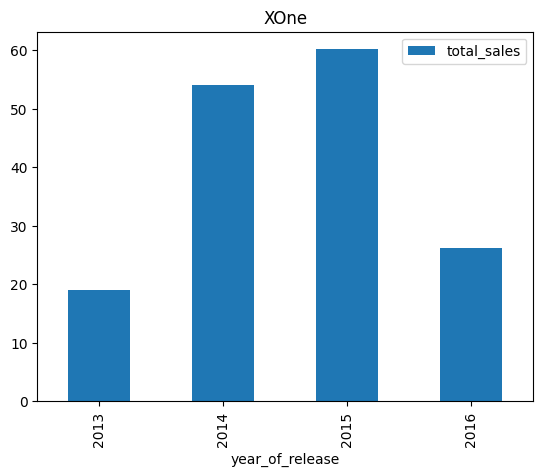

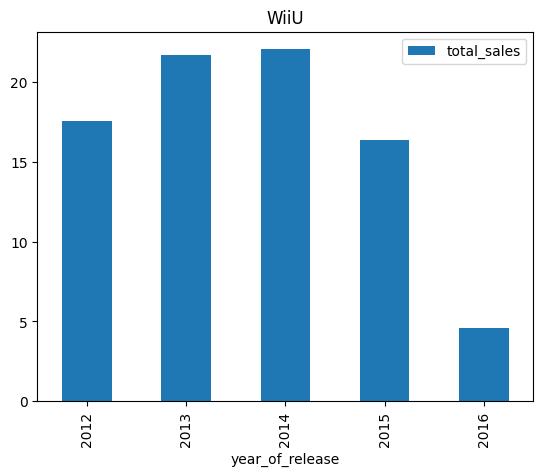

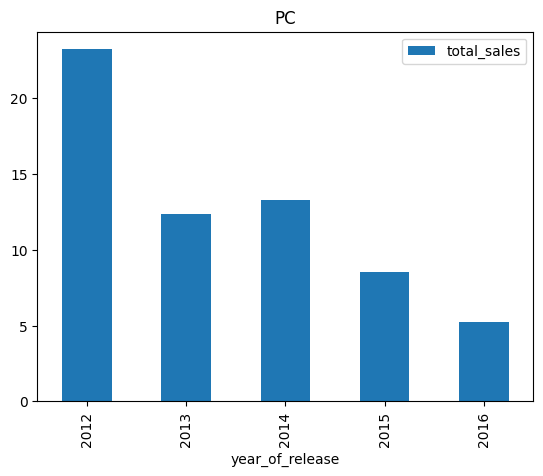

In [31]:
for platform in top_platforms:
    platfom_by_years = data[data['platform'] == platform].\
    pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    platfom_by_years.plot(y='total_sales', kind='bar', title=platform)

За 2016 возможно ещё не собрали все данные о продажах, объясняет их низкие показатели в сравнение с 2015 годом. На данный момент наиболее перспективными платформами являются:
PS4, XOne, WiiU, 3DS.

### Исследование особенностей продаж игр.

Построим графики "ящиков с усами" для различных платформ.

<Axes: title={'center': 'total_sales'}, xlabel='platform'>

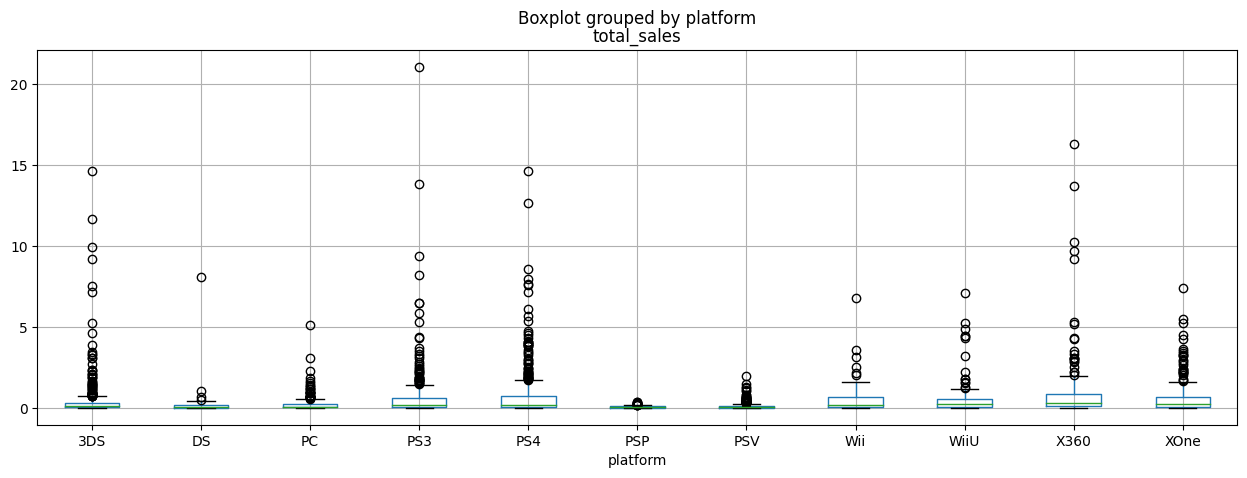

In [32]:
data.boxplot('total_sales', by='platform', figsize=(15, 5))

Из-за больших верхних выбросов нельзя сравнить данные о платформах между собой, поэтому ограничим значения на графике до 2 (млн копий).

(0.0, 2.0)

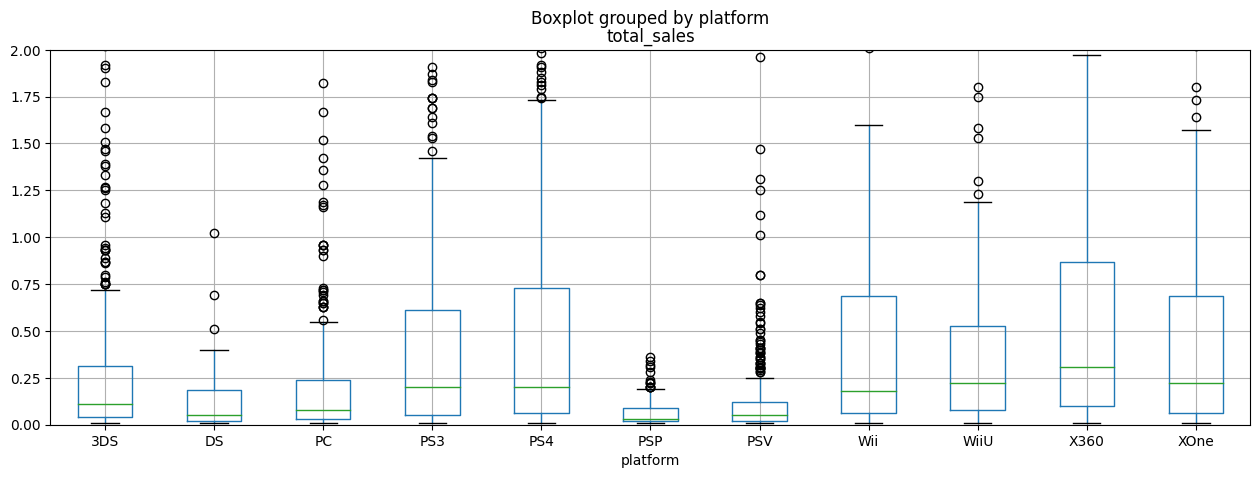

In [33]:
data.boxplot('total_sales', by='platform', figsize=(15, 5))
plt.ylim([0, 2])


На диаграмме видно, что только у X360 медиана проданных игр находится на уровне 0.25 млн проданных копий, у Xone, WiiU, PS4 и PS3 немного меньше этого значения, а у остальных значительно меньше.

In [34]:
for platform in top_platforms:
    top_threshold = data[data['platform'] == platform]['total_sales'].describe()['75%'] + \
    1.5 * (data[data['platform'] == platform]['total_sales'].describe()['75%'] - \
           data[data['platform'] == platform]['total_sales'].describe()['25%'])
    ratio = data.loc[(data['platform'] == platform) & (data['total_sales'] > top_threshold)]['total_sales'].sum() / \
    data.loc[data['platform'] == platform]['total_sales'].sum()
    print(platform, round(ratio*100), '%')

PS4 67 %
PS3 52 %
X360 47 %
3DS 74 %
XOne 53 %
WiiU 55 %
PC 60 %


Для всех актуальных платформ данные о продажах, являющиеся "выбросами" составляют 75-85% от общего числа продаж, т.е. большую часть продаж составляют несколько игр-бестселлеров.

In [35]:
check = data[data['platform'] == 'PS4']
(check[(check['total_sales'] >= check['total_sales'].quantile(0.75)) |
      (check['total_sales'] <= check['total_sales'].quantile(0.25))]).shape[0]/check.shape[0]

0.5357142857142857

In [36]:
check = data[data['platform'] == 'PS4']
(check[check['total_sales'] >= check['total_sales'].quantile(0.75)]).shape[0]/check.shape[0]

0.2576530612244898

In [37]:
for platform in top_platforms:
    top_threshold = data[data['platform'] == platform]['total_sales'].describe()['75%']
    ratio = data.loc[(data['platform'] == platform) & (data['total_sales'] >= top_threshold)]['total_sales'].count() / \
    data.loc[data['platform'] == platform]['total_sales'].count()
    print(platform, ratio)

PS4 0.2576530612244898
PS3 0.2535496957403651
X360 0.2568493150684932
3DS 0.25
XOne 0.25101214574898784
WiiU 0.25170068027210885
PC 0.256


In [38]:
check = data[data['platform'] == 'PS4']
check[check['total_sales'] >= check['total_sales'].quantile(0.75)]['total_sales'].sum() / check['total_sales'].sum()

0.8373655058254285

### Исследование влияния оценок критиков на продажи игр.

Рассмотрим влияние оценок критиков на продажи игры в рамках платформы "PS4".

In [39]:
data[data['platform'] == 'PS4']['total_sales'].corr(data['critic_score'])

0.406567902061781

<Axes: xlabel='critic_score', ylabel='total_sales'>

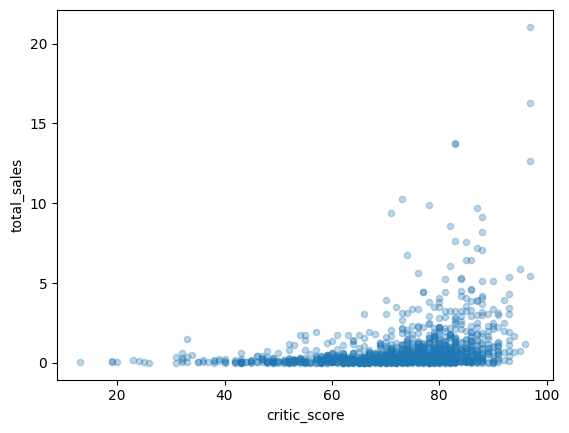

In [40]:
data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

Значение корреляции 0.4, что говорито слабой связи, но график плохо читаем из-за выбросов в значениях продаж.
Создадим дополнительный датасет с очищенными значениями о продажах и снова рассмотрим наличие корреляции между оценкой критиков и продажами игр.

In [41]:
def clear_data(data, criteria):
    stat_data = data[criteria].describe()
    IQR = stat_data['75%'] - stat_data['25%']
    bottom_threshold = stat_data['25%'] - 1.5 * IQR
    if bottom_threshold < 0:
        bottom_threshold = 0
    top_threshold = stat_data['75%'] + 1.5 * IQR
    return data[(data[criteria] > bottom_threshold) & (data[criteria] < top_threshold)]

cleared_data = clear_data(data, 'total_sales')

In [42]:
cleared_data[cleared_data['platform'] == 'PS4']['total_sales'].corr(cleared_data['critic_score'])

0.30703188435294787

<Axes: xlabel='critic_score', ylabel='total_sales'>

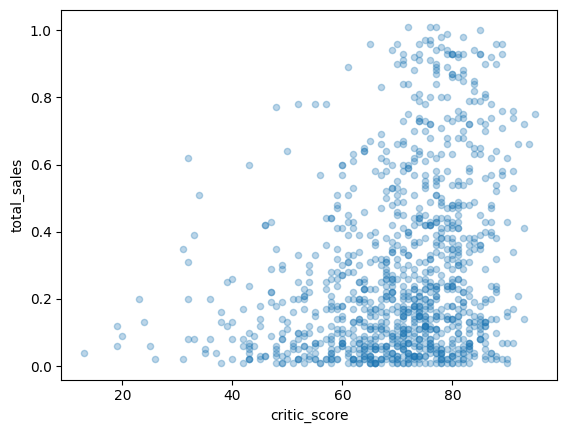

In [43]:
cleared_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)

Получили, что для очищенных данных корреляция ещё меньше. Также видно, что чаще всего критики ставят достаточно высокие оценки( больше 60%).

### Исследование влияния оценок игроков на продажи игр.

Повторим те же действия и проверим корреляцию между оценками игроков и продажами игр.

In [44]:
data[data['platform'] == 'PS4']['total_sales'].corr(data['user_score'])

-0.031957109005188285

<Axes: xlabel='user_score', ylabel='total_sales'>

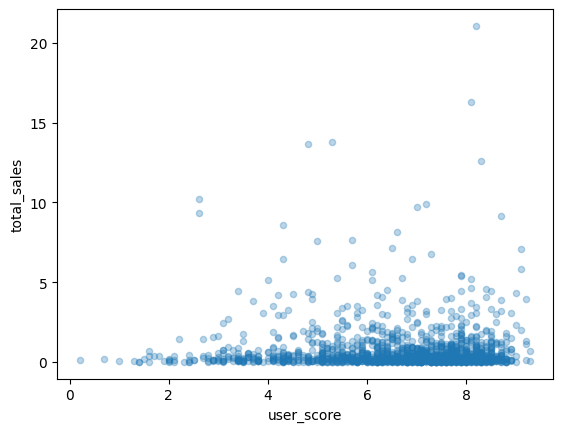

In [45]:
data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)

In [46]:
cleared_data[cleared_data['platform'] == 'PS4']['total_sales'].corr(cleared_data['user_score'])

-0.01179655646576935

<Axes: xlabel='user_score', ylabel='total_sales'>

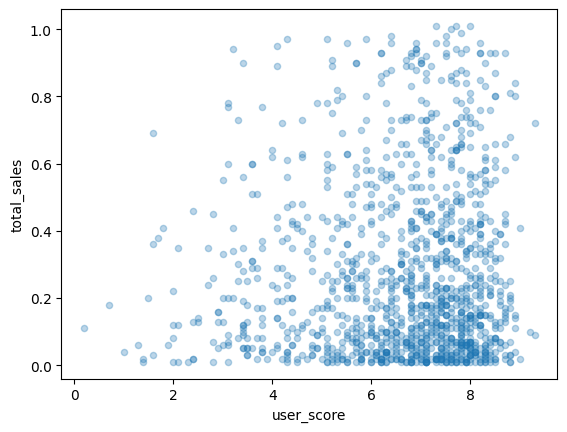

In [47]:
cleared_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)

Получили очень слабую отрицательную корреляцию между оценками игроков и продажами, что частично можно объяснить склонностью игроков ставить низкие оценки.

In [48]:
for platform in top_platforms:
    user_corr = data[data['platform'] == platform]['total_sales'].corr(data['user_score'])
    crit_corr = data[data['platform'] == platform]['total_sales'].corr(data['critic_score'])
    print(platform, round(crit_corr, 2), round(user_corr, 2))

PS4 0.41 -0.03
PS3 0.33 -0.01
X360 0.36 0.01
3DS 0.32 0.2
XOne 0.42 -0.07
WiiU 0.35 0.4
PC 0.24 -0.12


Корреляция продаж с оценками критиков и игроков примерно одинаковая на всех платформах, за исключеним платформы "WiiU", где корреляция с оценками игроков составляет 0.4.

### Исследование распределение продаж игр по жанрам.

Посмотрим на распределение игр по жанрам.

In [49]:
genre_stats = data.pivot_table(index='genre', \
                                  values=['total_sales', 'name'], \
                                  aggfunc={'total_sales': 'median', 'name': 'count'}).\
sort_values('total_sales', ascending=False)
genre_stats.columns=['number of titles', 'median_sales']
genre_stats

,number of titles,median_sales
genre,,
Shooter,235,0.440
Sports,268,0.240
Platform,85,0.210
Role-Playing,370,0.140
Racing,115,0.140
Fighting,109,0.130
Action,1031,0.120
Misc,192,0.120
Simulation,80,0.120


<Axes: title={'center': 'Genres breakdown in 2011-2016'}, ylabel='number of titles'>

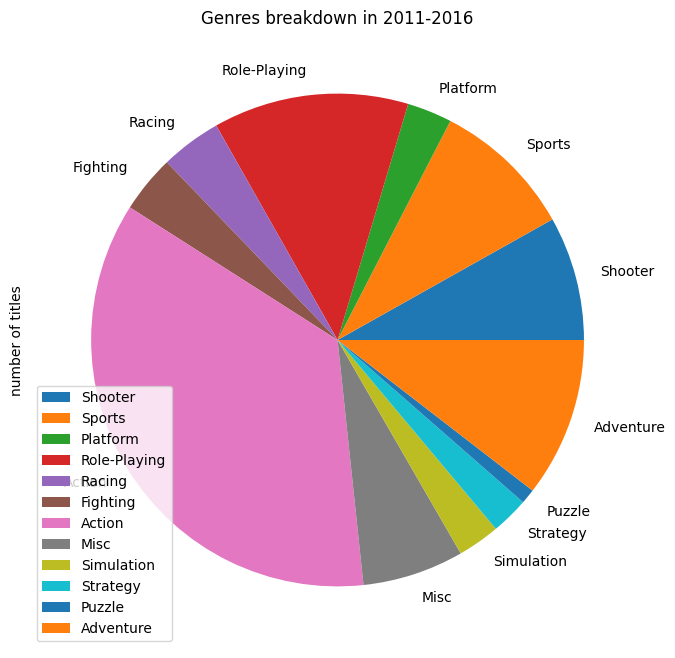

In [50]:
genre_stats.plot(kind='pie', y='number of titles', title='Genres breakdown in 2011-2016', figsize=(8, 8))

Самые популярные жанры по количеству выпускаемых игр:
1. Action
1. Role_Playing
1. Adventure
1. Sports
1. Shooter

<Axes: title={'center': 'Sales by genres in 2011-2016'}, ylabel='median_sales'>

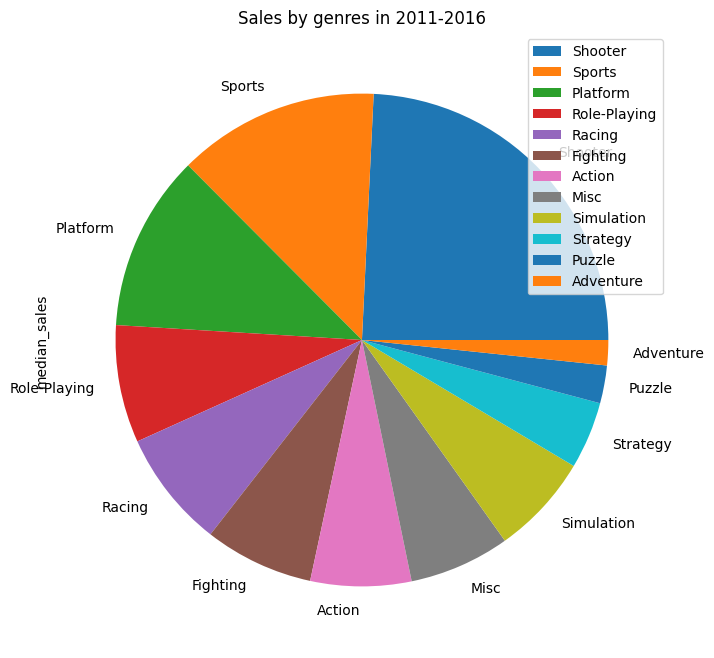

In [51]:
genre_stats.plot(kind='pie', y='median_sales', title='Sales by genres in 2011-2016', figsize=(8, 8))

Самые продаваемые жанры:
1. Shooter
1. Sports
1. Platform
1. Role-Playing
1. Racing

Это примерно совпадает, с популярностью игр по жанрам.

## Портрет пользователя каждого региона.

### Исследование распределения продаж по платформам в каждом регионе.

In [52]:
def portrait_by_region_criteria(data, region, criteria):
    some_stats = data.pivot_table(index=criteria, \
                                  values=[region, 'name'], \
                                  aggfunc={region:'sum', 'name': 'count'}).\
sort_values(region, ascending=False).head()
    some_stats.columns = [region, 'number of titles']
    display(some_stats)   
    some_stats.plot(kind='pie', y=region, title=f'Top 5 {criteria} for {region} in 2011-2016', figsize=(8,8))
    plt.show()

,na_sales,number of titles
platform,,
X360,140.05,292
PS4,108.74,392
PS3,103.38,493
XOne,93.12,247
3DS,55.31,396


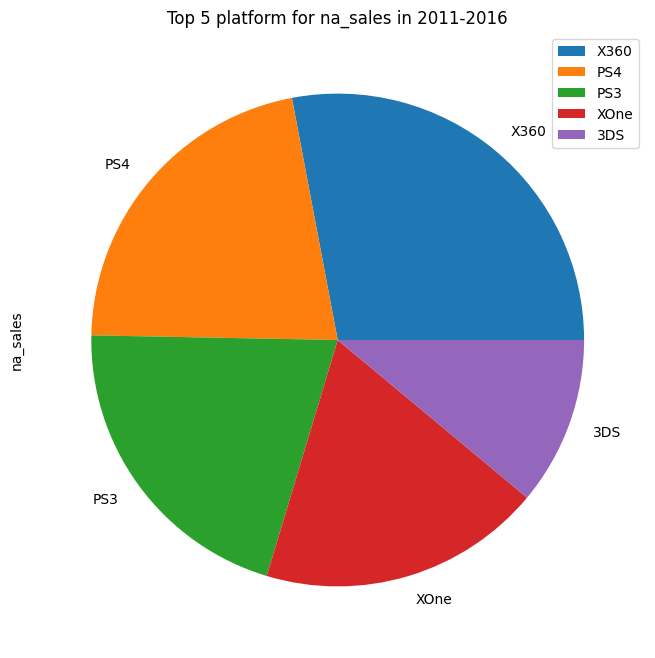

,eu_sales,number of titles
platform,,
PS4,141.09,392
PS3,106.86,493
X360,74.52,292
XOne,51.59,247
3DS,42.64,396


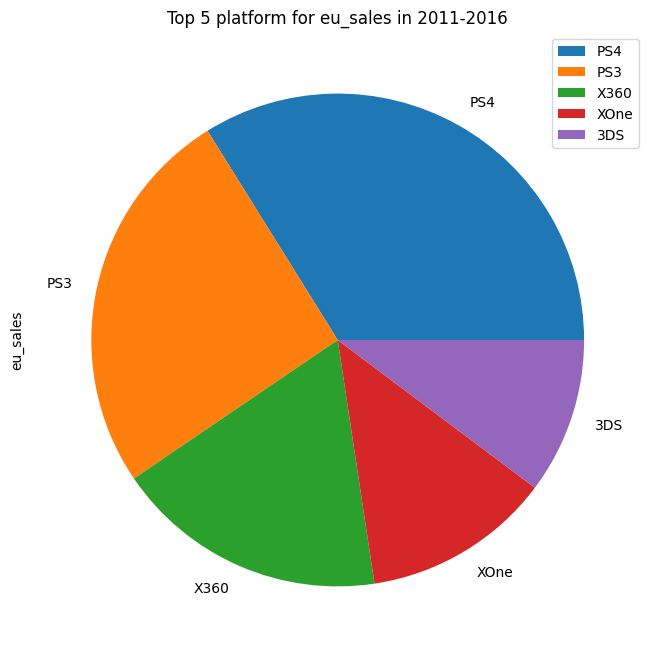

,jp_sales,number of titles
platform,,
3DS,87.79,396
PS3,35.29,493
PSV,21.04,411
PS4,15.96,392
WiiU,13.01,147


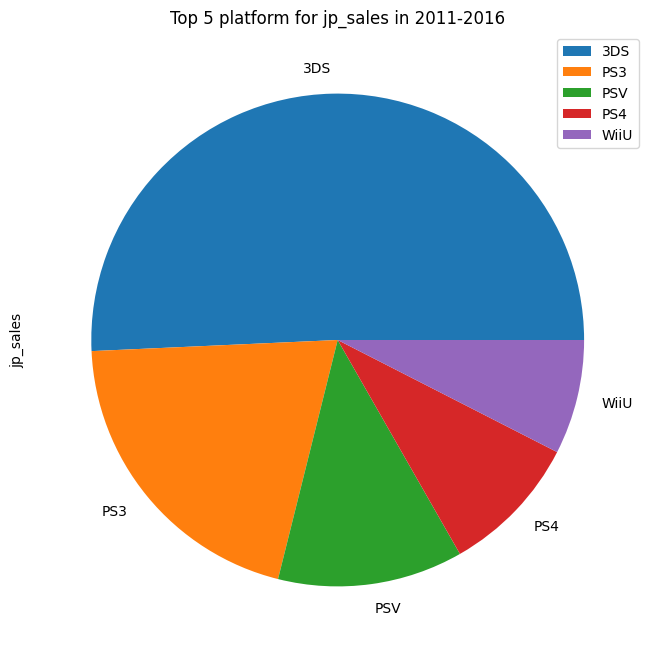

,other_sales,number of titles
platform,,
PS4,392,48.35
PS3,493,43.26
X360,292,20.40
XOne,247,14.27
3DS,396,8.87


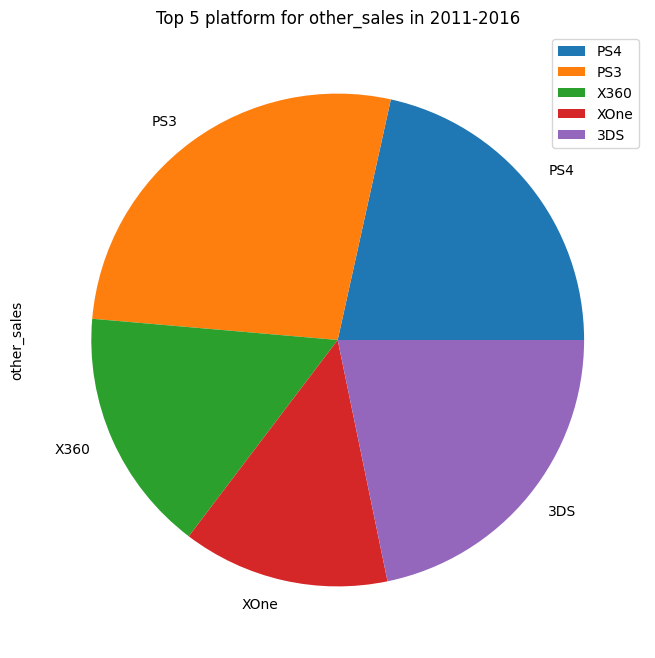

In [53]:
for region in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    portrait_by_region_criteria(data, region, 'platform')

Для Северной Америки самой востребованной платформой является 'X360', для Европы и прочих территорий - 'PS4', для Японии - '3DS.

### Исследование распределения продаж по жанрам в каждом регионе.

,na_sales,number of titles
genre,,
Action,177.84,1031
Shooter,144.77,235
Sports,81.53,268
Role-Playing,64.00,370
Misc,38.19,192


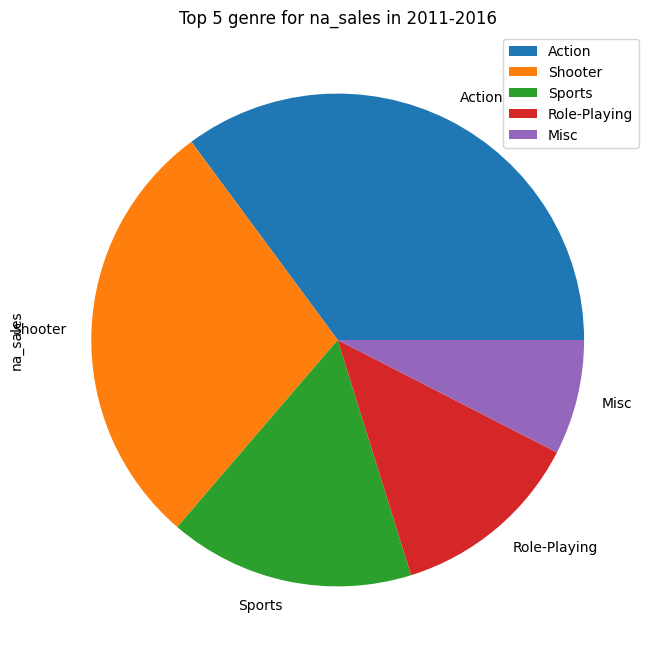

,eu_sales,number of titles
genre,,
Action,159.34,1031
Shooter,113.47,235
Sports,69.09,268
Role-Playing,48.53,370
Racing,27.29,115


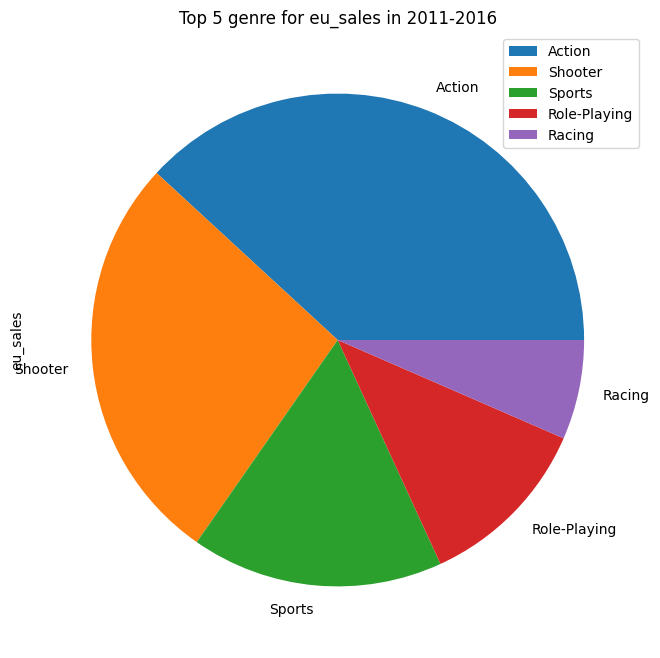

,jp_sales,number of titles
genre,,
Role-Playing,65.44,370
Action,52.80,1031
Misc,12.86,192
Simulation,10.41,80
Fighting,9.44,109


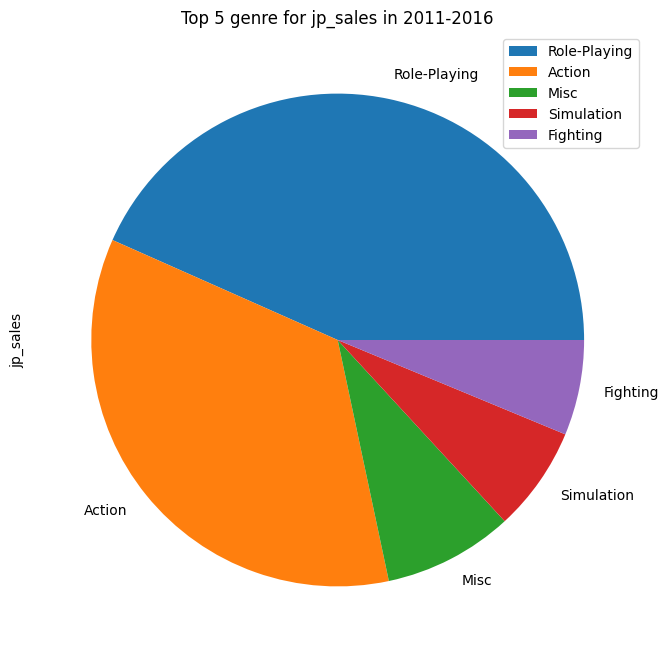

,other_sales,number of titles
genre,,
Action,1031,51.14
Shooter,235,37.26
Sports,268,22.44
Role-Playing,370,14.83
Misc,192,7.67


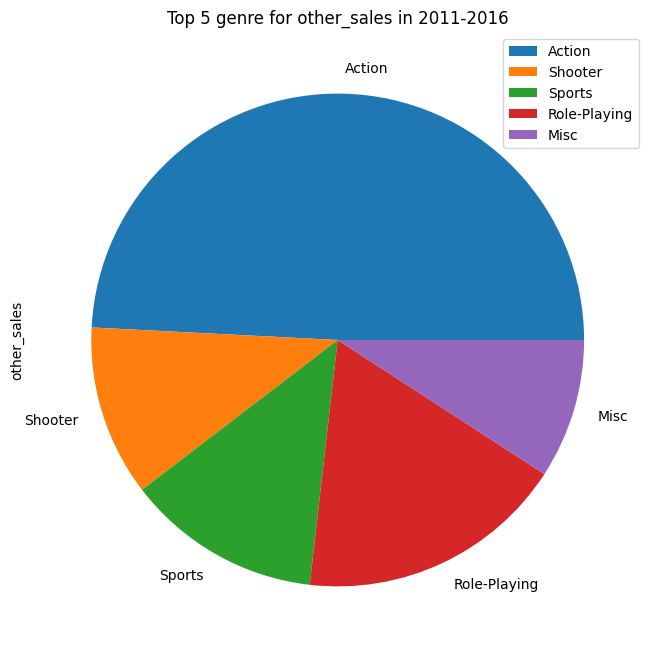

In [54]:
for region in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    portrait_by_region_criteria(data, region, 'genre')

В Японии почти половина продаж приходится на жанр 'Role-Playing', в то время как в остальных регионах главные жанры - 'Action', 'Shooter', 'Sports'.

### Исследование распределения продаж по возрастным рейтингам в каждом регионе.

,na_sales,number of titles
rating,,
M,231.57,498
E,114.37,395
undefined,103.31,1275
E10+,75.70,306
T,66.02,412


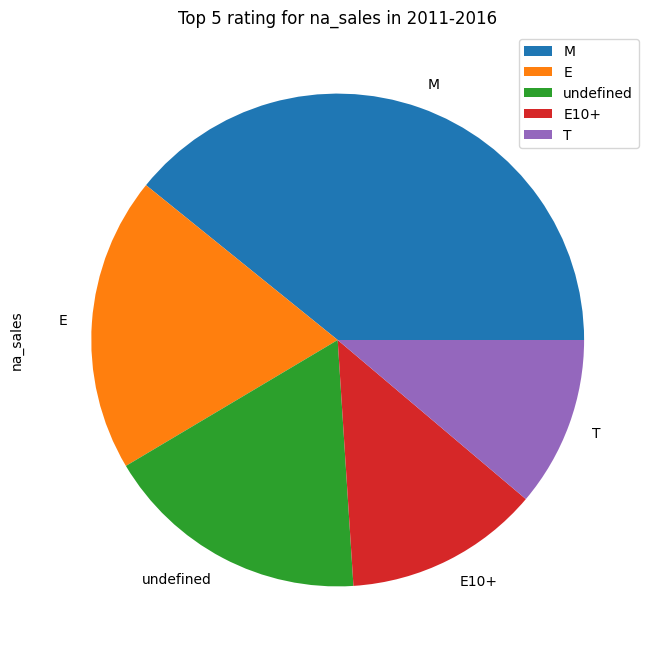

,eu_sales,number of titles
rating,,
M,193.96,498
E,113.03,395
undefined,91.50,1275
E10+,55.37,306
T,52.96,412


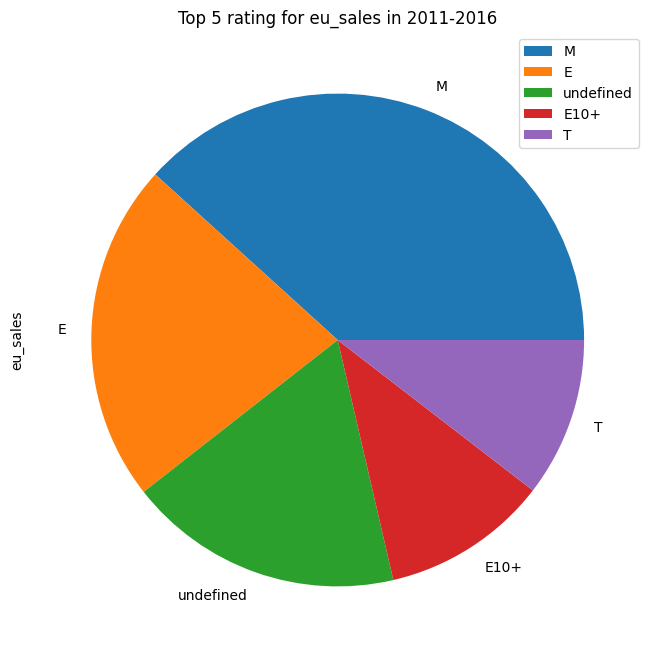

,jp_sales,number of titles
rating,,
undefined,108.84,1275
E,28.33,395
T,26.02,412
M,21.20,498
E10+,8.19,306


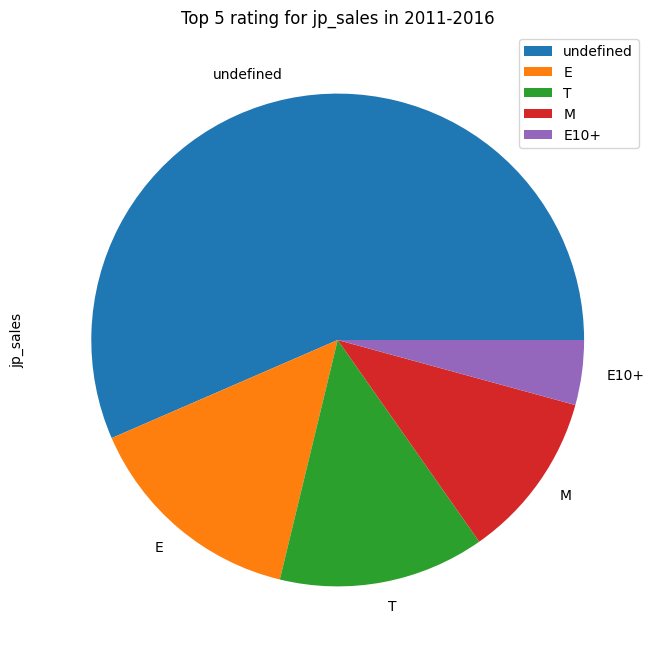

,other_sales,number of titles
rating,,
M,498,63.38
E,395,31.44
undefined,1275,27.17
T,412,17.94
E10+,306,16.23


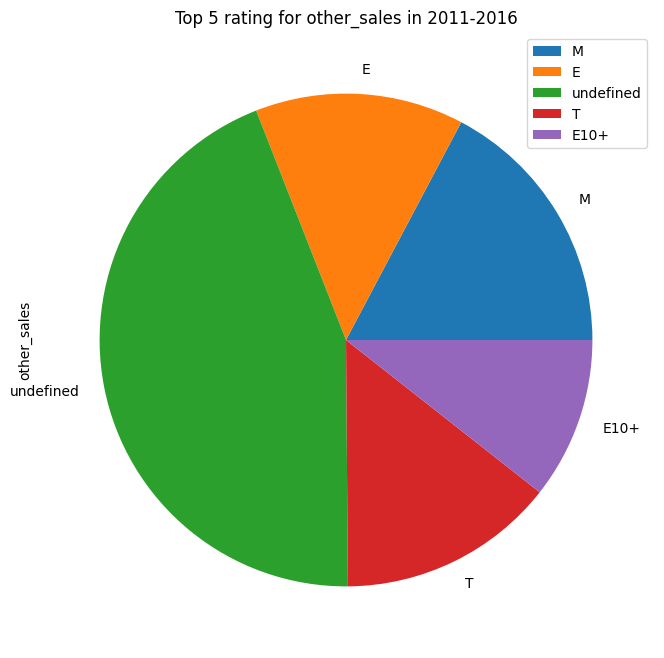

In [55]:
for region in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    portrait_by_region_criteria(data, region, 'rating')

Как видно, для всех регионов кроме Японии преобладают продажи с рейтингом 'M', связано это в первую очередь с тем, что у самого популярного жанра 'Action' чаще всего встречается рейтинг 'M', в то время как для самого популярного жанра в Японии 'Role-Playing' информация о возрастном рейтинге чаще всего отсутствует.

<Axes: >

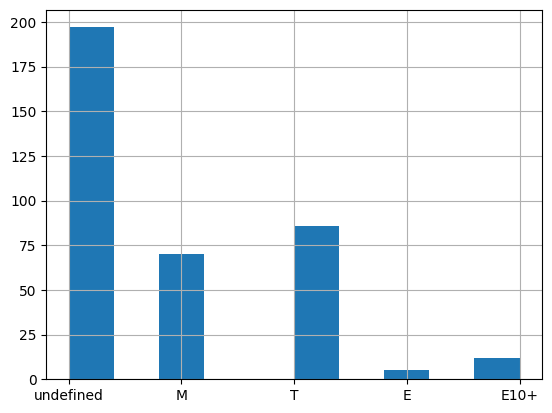

In [56]:
data[data['genre'] == 'Role-Playing']['rating'].hist()

<Axes: >

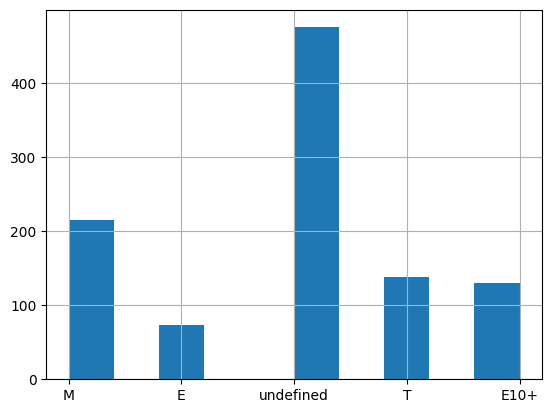

In [57]:
data[data['genre'] == 'Action']['rating'].hist()

## Проверка гипотез

### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н_0: Пользователький рейтинг (user_score) для игр проданных на Xbox One = Пользовательскому рейтингу (user_score) для игр проданных на PC.  Н_1: Пользователький рейтинг (user_score) для игр проданных на Xbox One ≠ Пользовательскому рейтингу (user_score) для игр проданных на PC.

In [58]:
alpha = 0.05

results = st.ttest_ind(\
                       data.loc[(data['user_score'].notna()) & (data['platform'] == 'XOne')]['user_score'], \
                       data.loc[(data['user_score'].notna()) & (data['platform'] == 'PC')]['user_score'], \
                       equal_var = False)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5489560463017016
Не получилось отвергнуть нулевую гипотезу


Значит, для уровня значимости 0.05 можно сказать, что средние оценки игроков для XOne и PC одинаковые.

### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports (англ. «спортивные соревнования») разные.

Н_0: Пользователький рейтинг (user_score) для игр жанра Action = Пользовательскому рейтингу (user_score) для игр жанра Sports.  
Н_1: Пользователький рейтинг (user_score) для игр жанра Action ≠ Пользовательскому рейтингу (user_score) для игр жанра Sports.

In [59]:
results = st.ttest_ind(\
                       data.loc[(data['user_score'].notna()) & (data['genre'] == 'Action')]['user_score'], \
                       data.loc[(data['user_score'].notna()) & (data['genre'] == 'Sports')]['user_score'], \
                       equal_var = False)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.242899260229549e-20
Отвергаем нулевую гипотезу


Значит, для уровня значимости 0.05 можно сказать, что средние оценки игроков для XOne и PC разные.

## Результаты исследования:

1. В ходе изучения имеющегося датасета были выявлены значительное количество пропусков в столбцах с годами релиза игр, оценками критиков и игроков и рейтингами.
1. Пропуски в годах были заполнены медианными значениями по платформе, что позволило учесть продажи игр на актуальных платформах и отбросить данные со старых платформ.
1. Примерно для половины игр не было оценок критиков и игроков и рейтингов, тем не менее их количества вполне достаточно для формулирования статистических выводов.
1. На основании датасета были показаны платформы с исторически максимальными продажами, но к сожалению в настоящий момент эти платформы не актуальны, т.к. продаж на них нет или почти нет.
1. Далее были изучены самые прибыльные платформы за последние 5 лет, это: PS4, XOne, WiiU, 3DS.
1. Также было показано, что основную прибыль составляют продажи нескольких игр-бестселлеров, что свойственно всем платформам.
1. Исследование показало, что оценки критиков мало влияют на продажи игр, а оценки игроков почти не влияют.
1. Самым популярным жанром за последнее время является Action.
1. Был составлен портрет пользователя каждого региона, 
для NA - это платформа XOne, жанр Action, возрастная категория - М,
для EU - это платформа PS4, жанр Action, возрастная категория - М,
для JP - это платформа 3DS, жанр Role-Playing, возрастная категория не определена.
1. Были проверены гипотезы о равенстве средних оценок для платформ XOne и PC и о равенстве средних оценок для жанров Action и Sports.